<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-25/Ycut3rdsample_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git config --global user.email {userdata.get('email')}'
Cloning into 'gator'...
remote: Enumerating objects: 1135, done.
remote: Counting objects: 100% (425/425), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 1135 (delta 270), reused 274 (delta 175), pack-reused 710
Receiving objects: 100% (1135/1135), 65.78 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (639/639), done.
Updating files: 100% (153/153), done.


'/content'

### 25-07-24 LiTaO3 Ycut gating 3rd sample

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75% and then 10%

Taped the gating electrode at maximum



In [3]:
%cd "/content/gator/data/07-25/"

/content/gator/data/07-25


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0725_145551.csv')
df = pd.read_csv('defbuffer1_0725_145551.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-6.021888e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000099,Volt DC,1,F,2W,F,F,0.000000
1,-3.418789e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.000019,Volt DC,1,F,2W,F,F,0.408445
2,4.195290e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000264,Volt DC,1,F,2W,F,F,0.600218
3,1.396829e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.000018,Volt DC,1,F,2W,F,F,1.008724
4,-7.715203e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000591,Volt DC,1,F,2W,F,F,1.200484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20675,2.568804e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999975,Volt DC,1,T,2W,F,F,1607.071302
20676,2.568930e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,1607.140624
20677,2.566428e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,1607.209949
20678,2.566944e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,1607.279280


In [7]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

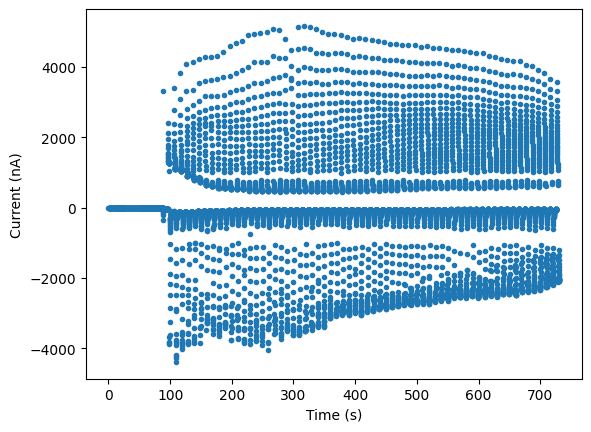

In [14]:
cut1 = 0
cut2 = 9000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Gating worked ! Periodicity happening :))

Text(0.5, 0, 'Time (s)')

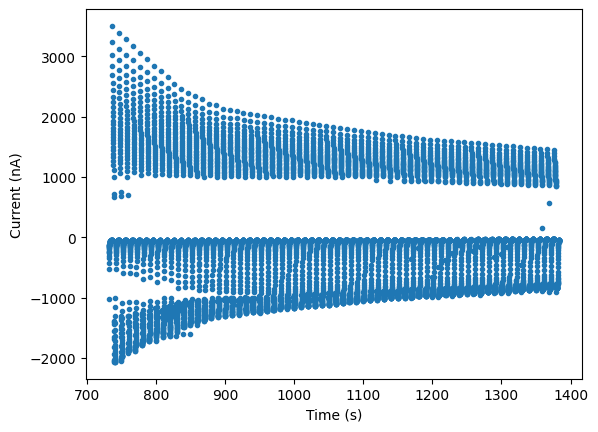

In [21]:
cut1 = 9000
cut2 = 17500
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Current starting decreasing

Text(0.5, 0, 'Time (s)')

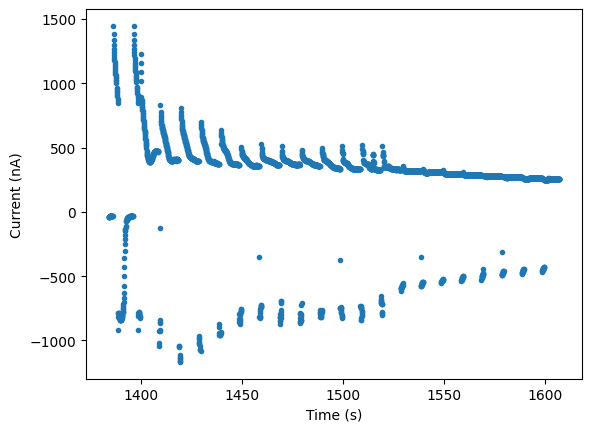

In [22]:
cut1 = 17500
cut2 = None
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [24]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value']
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-24-db179bee8aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [25]:

# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

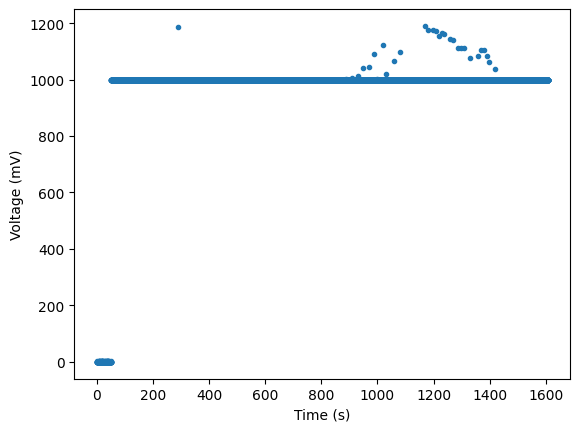

In [23]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()